## Projekti 4: Amplitudin vaimennus

Tässä projektissa simuloimme Jaynesin-Cummingsin mallia, joka tunnetaan myös yleisenä amplitudinvaimennusmallina. Simuloimme myös dynamiikan Markovisuutta kytkennän vahvuudesta riippuen. Lisätietoja mallista löydät täältä: [Open Quantum Systems with Qiskit](https://matteoacrossi.github.io/oqs-jupyterbook/jaynes_cummings_with_losses.html). 

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

Simuloidaksemme Jaynes-Cummingsin mallia, käsittelemme yhtä kubittia ($q_0$) systeeminä ja käytämme yhtä lisäkubittia ($q_1$) toteuttamaan dynaamisen kuvauksen. Toisin sanoin emme simuloi systeemin ja ympäristön dynamiikkaa, vaan ainoastaan lopputuloksena systeemikubittiin saatavaa kanavaa. Tästä huolimatta viittaamme lisäkubittiin $q_1$ ympäristökubittina. Koska kanavan ainoa parametri on $c_1(t)$ (jonka parametri puolestaan on aika), seuraava piiri johtaa tällaiseen dynamiikkaan: 

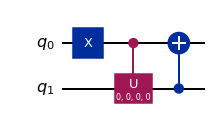

In [2]:
###########################################
#        Amplitude damping channel        #
###########################################

# Quantum register
q = QuantumRegister(2, name='q')

# Quantum circuit
ad = QuantumCircuit(q)

# Amplitude damping channel acting on system qubit
## Qubit identification
system = 0
environment = 1

# Define rotation angle
theta = 0.0

# Construct circuit
ad.x(q[system])
# Notice the extra factor 2 due to how qiskit defines the unitary angles
ad.cu(theta, 0.0, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

# Draw circuit
ad.draw(output='mpl')

Muista, että yllä olevassa piirissä $\theta = \arccos{c_1(t)}$, jossa
\begin{equation}
c_{1}(t)=e^{-\lambda t/2}\left[\cosh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)+\frac{1}{\sqrt{1-2R}}\sinh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)\right].
\end{equation}

### Tehtävä 1 (1p)

Kirjoita funktio, joka palauttaa parametrin $c_1(t)$. Funktion tulisi hyväksyä ylimääräinen parametri $R$ ja palauttaa oikea arvo kummassakin tapauksessa, $R > 1/2$ ja $R < 1/2$. 

Tässä on ehdotus funktion rakenteeksi: 

In [3]:
def c1(R,t):
    """Returns the coherence factor in the amplitude damping channel
    
    Args:
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A float number
    """

### Tehtävä 2 (1p)

Kirjoita funktio, joka palauttaa amplitudinvaimennuskanavan annetuille $R$:n ja $t$:n arvoille. Voit joko sisällyttää systeemin alkutilan ($|1\rangle$) funktioon tai alustaa tilan jossain muualla myöhemmin. 

Ehdotus rakenteeksi: 

In [4]:
def amplitude_damping_channel(q, c, sys, env, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubit
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Tehtävä 3 (3p)

Valitse joitakin (ainakin kaksi) $R$:n arvoa. Näiden joukosta pitäisi löytyä sekä suurempia että pienempiä arvoja kuin $1/2$. Simuloi jokaista arvoa kohden amplitudinvaimennuskanava useilla $t$:n arvoilla ja mittaa atomin todennäköisyys olla virittyneessä tilassa ($|1\rangle$) sekä meluttomassa että melullisessa simulaattorissa (esim. FakePerth), käyttäen lukuvirheen vaimennusta ([LocalReadoutError](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.library.characterization.LocalReadoutError.html)). Piirrä kuvaajat tuloksista. 

### Tehtävä 4 (1p)

Siirrämme nyt huomion dynamiikan Markovisuuteen. Tätä varten simuloimme kanavan, joka esittelee todisteen (witness) ei-Markovisuudelle (piiri alla). 

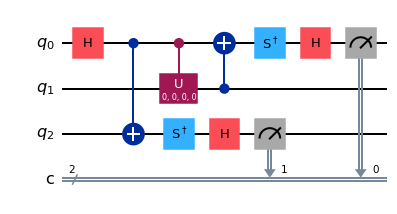

In [3]:
#######################################
#      Amplitude damping channel      #
#         with non-M. witness         #
#######################################

# Quantum and classical register
q = QuantumRegister(3, name='q')
c = ClassicalRegister(2, name='c')

# Quantum circuit
ad = QuantumCircuit(q, c)

# Amplitude damping channel acting on system qubit
# with non-Markovianity witness
## Qubit identification
system = 0
environment = 1
ancilla = 2

# Define rotation angle
theta = 0.0

# Construct circuit
## Bell state between system and ancilla
ad.h(q[system])
ad.cx(q[system], q[ancilla])

## Channel acting on system qubit
ad.cu(theta, 0.0, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

## Local measurement for the witness
### Choose observable
observable = 'YY'
### Change to the corresponding basis
if observable == 'XX':
    ad.h(q[system])
    ad.h(q[ancilla])
elif observable == 'YY':
    ad.sdg(q[system])
    ad.h(q[system])
    ad.sdg(q[ancilla])
    ad.h(q[ancilla])
### Measure
ad.measure(q[system], c[0])
ad.measure(q[ancilla], c[1])

# Draw circuit
ad.draw(output='mpl')

Todennäköisyys mitata systeemi ja apukubitti tilasta $| \phi^{+} \rangle \langle \phi^{+} | = (\mathbb{I}\otimes \mathbb{I} + \sigma_{x}\otimes \sigma_{x} - \sigma_{y}\otimes \sigma_{y} + \sigma_{z}\otimes \sigma_{z})/4$ antaa todisteen ei-Markovisuudesta. Yllä oleva piiri mahdollistaa näitä vastaavien suureiden mittaamisen. 

Kirjoita funktio, joka palauttaa annetulle todistesuureelle ja parametreille $R$ ja $t$ niitä vastaavan piirin. 

Ehdotus rakenteeksi:

In [ ]:
def amplitude_damping_channel_witness(q, c, sys, env, anc, observable, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit with non-Markovianity witness
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system and ancilla qubits
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        anc (int): index for the ancillary qubit
        observable (str): the observable to be measured. Possible values "XX", "YY", "ZZ"
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Tehtävä 5 (4p)

Simuloi dynamiikkaa todisteen kanssa samoilla $R$:n ja $t$:n arvoilla kuin tehtävässä 3. Aja siis piirit sekä meluttomassa että meluisassa simulaattorissa (esim. FakePerth) käyttäen lukuvirheen vaimennusta kolmelle suureelle $\sigma_{x}\otimes \sigma_{x}$, $\sigma_{y}\otimes \sigma_{y}$ ja $\sigma_{z}\otimes \sigma_{z}$ ja laske niiden odotusarvot. Tämän avulla voit laskea todisteen arvon kaavalla $1 + \left\langle \sigma_{x}\otimes \sigma_{x} \right\rangle - \left\langle\sigma_{y}\otimes \sigma_{y} \right\rangle + \left\langle\sigma_{z}\otimes \sigma_{z} \right\rangle)/4$. Piirrä tulokset $t$:n funktiona.

### Valinnainen lisätehtävä

Aja tehtävän piirit IBM Quantum –laitteella käyttäen lukuvirheen vaimennusta ja piirrä kuvaajat tuloksista. 